In [1]:
from HGCalImageAlgo3D import *
from timeit import default_timer as timer

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/Users/zihengchen/Documents/HGCal/workplace/data/'
DatasetFile = 'CMSSW9304_partGun_PDGid22_x1000_E300.0To300.0_NTUP'
#%run ../scripts/utility_getinputhits_genpart.py $DatasetDir $DatasetFile 5 100

Calibrate Event: 100/100


In [2]:
df          = pd.read_pickle(DatasetDir+"input/"+DatasetFile+"_rechit.pkl")
SetImagingAlgo()

## 1. Testing the running time

In [5]:
dfresultclus       = pd.DataFrame()
runnrect,runtime   = [],[]

for ishower in range(1,50,2):
    df_test = df[(df.id<=ishower) & (df.id>0)]
    runnrect.append( len(df_test) )
    timeishower = np.zeros(10)
    
    for run in range(10):
        time0 = timer()
        _,dfevtclus    = ImageAlgorithm_opencl(df_test,0, 1)
        #_,dfevtclus   = ImageAlgorithm_cpu (df_test,0)
        #_,dfevtclus   = ImageAlgorithm_cuda(df_test,0)
        time1 = timer()
        timeishower[run] = time1-time0
    runtime.append(timeishower)
runnrect,runtime = np.array(runnrect), np.array(runtime)

In [6]:
#np.savetxt("../data/performance/nrech.csv",runnrect, delimiter=",")
#np.savetxt("../data/performance/Inter_i7-4850HQ.csv", runtime, delimiter=",")
#np.savetxt("../data/performance/Inter_Iris-Pro-5200.csv" ,runtime, delimiter=",")
#np.savetxt("../data/performance/Nvidia_GT750M.csv",runtime, delimiter=",")
#np.savetxt("../data/performance/Nvidia_GT750M_cuda.csv",runtime, delimiter=",")


## 2. Read previous test

In [3]:
cpu    = np.genfromtxt("../data/performance/Inter_i7-4850HQ.csv", delimiter=",")
iris   = np.genfromtxt("../data/performance/Inter_Iris-Pro-5200.csv" , delimiter=",")
nvidia = np.genfromtxt("../data/performance/Nvidia_GT750M.csv", delimiter=",")
nvidia_cuda = np.genfromtxt("../data/performance/Nvidia_GT750M_cuda.csv", delimiter=",")
nrect  = np.genfromtxt("../data/performance/nrech.csv", delimiter=",")

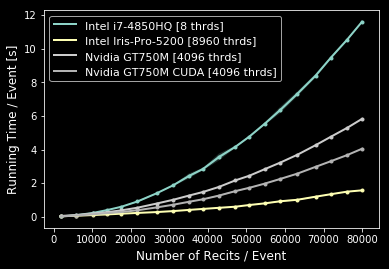

In [6]:
testlist = [cpu,iris,nvidia,nvidia_cuda]
namelist = ['Intel i7-4850HQ [8 thrds]','Intel Iris-Pro-5200 [8960 thrds]',
            'Nvidia GT750M [4096 thrds]','Nvidia GT750M CUDA [4096 thrds]']
colorlist= ["C0","C1","0.8","0.7"]

for i in range(len(testlist)):
    test_,name_,color_ = testlist[i],namelist[i],colorlist[i] 
    value = np.mean(test_,axis=1)
    delta = np.std(test_,axis=1)
    plt.fill_between(nrect, value-2*delta, value+2*delta,
                     facecolor=color_, linewidth=0, alpha=0.2)
    plt.fill_between(nrect, value-delta, value+delta, 
                     facecolor=color_, linewidth=0, alpha=0.4)
    plt.plot(nrect, value, c=color_, lw=2,label=name_)
    plt.scatter(nrect, value, c=color_,marker=".")
plt.xlabel("Number of Recits / Event",fontsize=12)
plt.ylabel("Running Time / Event [s]",fontsize=12)
plt.legend(fontsize=11)
plt.savefig("../plot/test_final.png")